# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

from ainvert import A_invert

In [2]:
fileNames = ["parrot.bmp", "clock.bmp", "chessboard.bmp", "lena.bmp", "firetruck.jpg"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)


parrot = cv2.imread('parrot.bmp')           # Read image
parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY) # Convert to RGB
clock = cv2.imread('clock.bmp')           # Read image
clock = cv2.cvtColor(clock, cv2.COLOR_BGR2GRAY) # Convert to RGB
chessboard = cv2.imread('chessboard.bmp')           # Read image
chessboard = cv2.cvtColor(chessboard, cv2.COLOR_BGR2GRAY) # Convert to RGB
lena = cv2.imread('lena.bmp')           # Read image
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY) # Convert to RGB
firetruck = cv2.imread('firetruck.jpg')           # Read image
firetruck = cv2.cvtColor(firetruck, cv2.COLOR_BGR2GRAY) # Convert to RGB

In [3]:
def show_img(img):
    plt.figure(figsize=(img.shape[0] / 100, img.shape[1] / 100), dpi=200)
    plt.imshow(img, cmap ="gray")
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

In [4]:
def bicubic_interpolation(img, coH, coW):
    oldH, oldW, = img.shape
    newH, newW = round(coH * oldH), round(coW * oldW)
    newImg = np.zeros((newH, newW))
    img = img.astype(np.int32)

    def dif_x(i, j):
        return (img[min(i, oldH - 1), min(j + 1, oldW - 1)] - img[min(i, oldH - 1), min(j - 1, oldW - 1)]) / 2

    def dif_y(i, j):
        return (img[min(i + 1, oldH - 1), min(j, oldW - 1)] - img[min(i - 1, oldH - 1), min(j, oldW - 1)]) / 2

    def dif_xy(i, j):
        return (img[min(i + 1, oldH - 1), min(j + 1, oldW - 1)] - img[min(i - 1, oldH - 1), min(j, oldW - 1)] -
                img[min(i, oldH - 1), min(j - 1, oldW - 1)] + img[min(i, oldH - 1), min(j, oldW - 1)]) / 4

    for i in range(newH):
        for j in range(newW):
            A = (int(i / coH), int(j / coW))
            B = (min(A[0], oldH - 1), min(A[1] + 1, oldW - 1))
            C = (min(A[0] + 1, oldH - 1), min(A[1] + 1, oldW - 1))
            D = (min(A[0] + 1, oldH - 1), min(A[1], oldW - 1))

            x = np.array(
                [img[A[0], A[1]], img[B[0], B[1]], img[C[0], C[1]], img[D[0], D[1]],
                 dif_x(A[0], A[1]), dif_x(B[0], B[1]), dif_x(C[0], C[1]), dif_x(D[0], D[1]),
                 dif_y(A[0], A[1]), dif_y(B[0], B[1]), dif_y(C[0], C[1]), dif_y(D[0], D[1]),
                 dif_xy(A[0], A[1]), dif_xy(B[0], B[1]), dif_xy(C[0], C[1]), dif_xy(D[0], D[1])]
                , dtype=np.float64)

            a = A_invert @ x
            a = a.reshape((4, 4)).T

            newImg[i, j] = np.power(j / coW - A[1], [0, 1, 2, 3]) \
                           @ a \
                           @ np.power(i / coH - A[0], [0, 1, 2, 3])

    return np.clip(newImg, 0, 255)

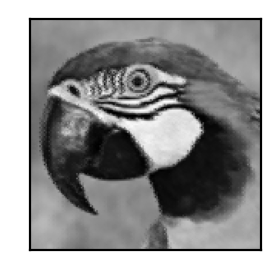

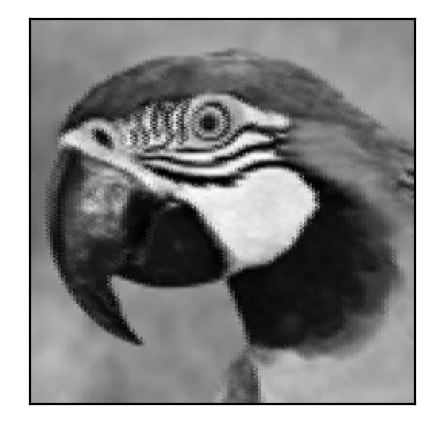

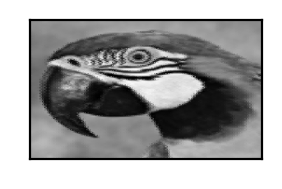

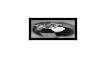

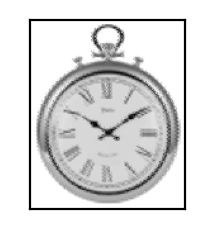

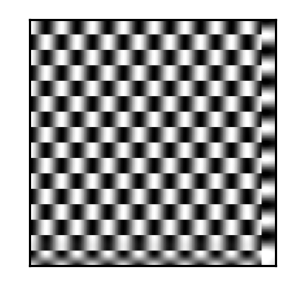

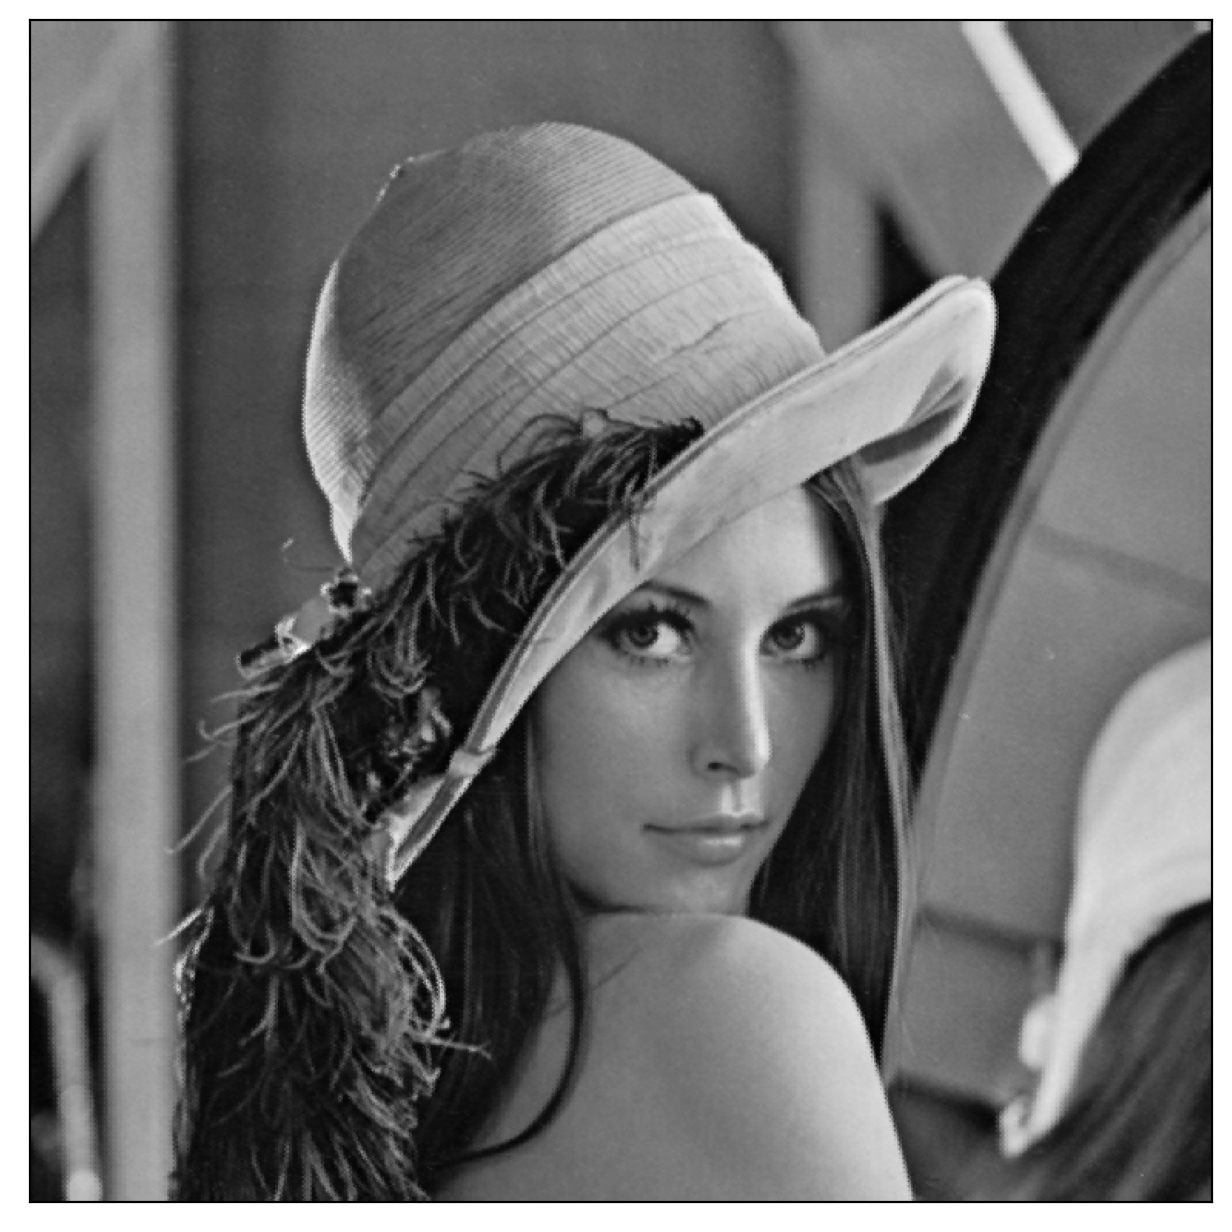

In [5]:
show_img(bicubic_interpolation(parrot, 1.5, 1.5))
show_img(bicubic_interpolation(parrot, 2.5, 2.5))
show_img(bicubic_interpolation(parrot, 1.5, 2.5))
show_img(bicubic_interpolation(parrot, 0.3, 0.7))
show_img(bicubic_interpolation(clock, 1.5, 1.5))
show_img(bicubic_interpolation(chessboard, 10, 10))
show_img(bicubic_interpolation(lena, 1.5, 1.5))